Проведём анализ главных компонент для данных о состоянии зубов пациентов (4 индекса, два из которых -- одинаковые, но измеренные разными врачами) в один и тот же момент времени.
Индексы:
- `DGI` -- гингивитный индекс
- `KGI` -- гингивитный индекс (то же, что и `DGI`, но подсчитанное другим врачом)
- `MGI` -- гингивитный индекс
- `PLI` -- бляшечный индекс

In [13]:
INITIAL <- read.table("./INITIAL.DAT", header=TRUE, quote="\"")
aggregated <- INITIAL[,-1]  # remove extra column with row number
head(aggregated)

,DGI,KGI,MFI,PLI
1,1.15,1,1.64,1.08
2,1.29,1.22,1.75,1.34
3,1.28,1.39,1.77,1.78
4,0.85,0.82,1.09,1.18
5,1.1,0.79,1.37,1.25
6,0.81,0.76,1.2,1.32


Построим анализ главных компонент для этих данных, то есть выделим те комбинации переменных, которые наиболее полно описывают различия в данных.

In [14]:
pc <- prcomp(aggregated,  scale. = TRUE)
summary(pc)

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.4904 1.0689 0.6627 0.44381
Proportion of Variance 0.5553 0.2857 0.1098 0.04924
Cumulative Proportion  0.5553 0.8410 0.9508 1.00000

Базовая информация показывает нам стандартные отклонения главных компонент (`Standard deviation`, в обозначениях анализа главных компонент, где разложение по главным компонентам выглядит как $\mathbb Y = \sum_{i=1}^d \sqrt{\lambda_i} U_i V_i ^\mathsf T$, стандартное отклонение -- это $\sqrt{\lambda_i}$) и часть дисперсии, ими объяснённую (каждой компонентой в отдельности и во второй строке и всеми компонентами до этой  включительно в третьей) -- считается как $\frac{\lambda_i}{\sum_{j=1}^d \lambda_j}$ и $\frac{\sum_{l=1}^i\lambda_l}{\sum_{j=1}^d \lambda_j}$ соответственно.

Посмотрим ещё раз на собственные числа. Сейчас мы проводим анализ на центрированных и нормированных данных (соответствующие параметры prcomp -- `center = TRUE` по умолчанию, `scale. = TRUE` мы указали при вызове), поэтому это собственные числа корреляционной матрицы исходных данных. В силу своего происхождения величина $i$-го собственного числа -- это также величина дисперсии $i$-й главныой компоненты (того, насколько различаются индивиды в том направлении, в котором они наиболее похожи: $Y_1, \ldots, Y_n \in \mathbb R^k$ -- вектора, $i$-й из которых -- измеренные для $i$-го индивида признаки, $U_i$ = $\mathrm{arg}\,\max_{P\in \mathbb R^k: \forall j\in 1\mathbin : i-1 P\perp U_j} \sum_{j=1}^n \left<Y_j, P\right>$ -- $i$-е главное направление, $\left<Y_j, U_i\right>$ -- $i$-я главная компонента $j$-го индивида, а $i$-я главная компонента -- это вектор $i$-х главных компонент всех индивидов; тогда дисперсия $i$-й главной компоненты -- это степерь различия вкладов индивидов в это направление, и нам интересно иметь это различие максимальным, чтобы получить минимальное число признаков, которыми обясняются все различия между индивидами)

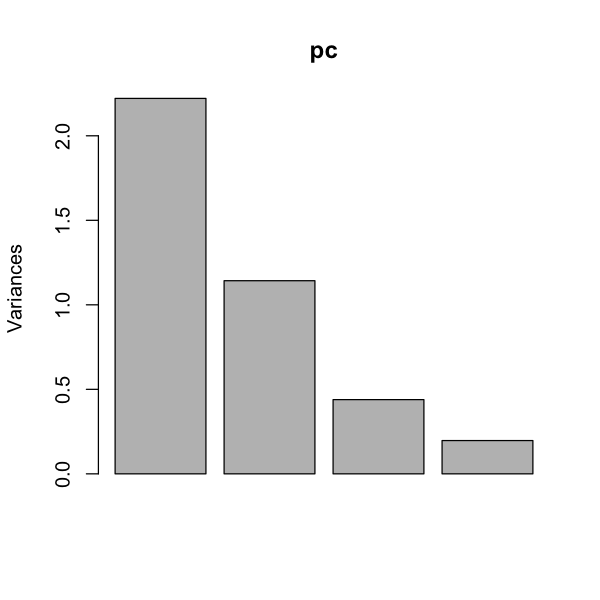

In [22]:
plot(pc)

Здесь мы видим, что первые две главных компоненты имеют значительно большую дисперсию, чем третья и четвёртая. В сумме (если обратиться к выводу `summary(pc)`) они объясняют 84% всех различий между признаками. Вместе с третьей -- 95%. К сожалению, у нас есть только эвристические методы для выбора оптимального числа главных компонент, но определённо не стоит уделять много внимания результатам по четвёртой главной компоненте.

Главные компоненты -- это линейные комбинации исходных признаков. Поэтому основной интерес в анализе главных компонент представляет собой изучение того, в каких комбинациях и с какими весами входят исходные признаки в главные компоненты.

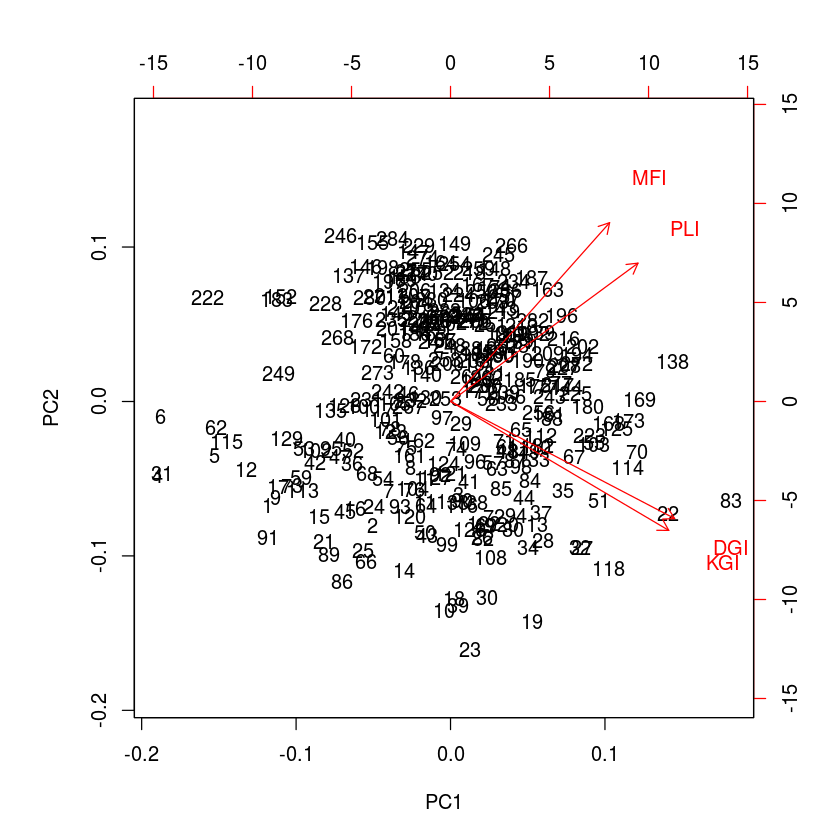

In [4]:
biplot(pc)

На графике мы видим наблюдения в координатах первых главных компонент (чёрным) и вектора исходных признаков в координатах первых двух главных компонент (красным), координатные сетки отмечены соответствующими цветами: справа и сверху -- красные для векторов, слева и снизу -- чёрные для наблюдений.

Из графика видно, что первая главная компонента (проекция векторов на горизонтальную ось) представляет собой сумму всех признаков, т.е. максимальное различие идёт по сумме всех индексов, а вторая -- разницу между первым гингивитным индексом (`DGI`/`KGI`, это один и тот же индекс) и вторым и бляшечным. Также можно заметить, что доанные достаточно однородны, в них нет никаких особенных выбросов.

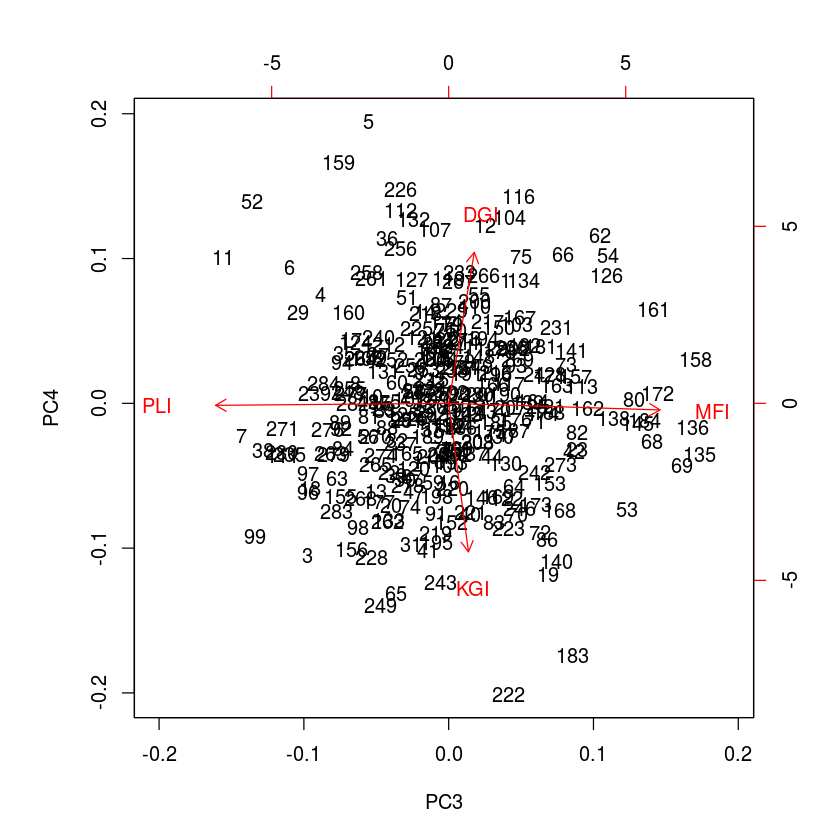

In [9]:
biplot(pc, choices=3:4)

Аналогичный график в координатах третьей и четвёртой главнфх компонент демонстрирует, что оставшиеся 16% различий в данных могут быть выражены как разница между гингивитным и бляшечным индексом (11%) и разницей между двумя измерениями первого гингивитного индекса (5%).

Можно сделать вывод, что наиболее различающим признаком в наблюдениях является общее состояние здоровья пациентов (сумма всех индексов), а различия в оценке разными врачами гингивитного индекса несущественны.